# pyICON.view for NextGems with xarray/dask from intake catalogue

Load the necessary modules:

In [1]:
# if this line is not separated from the line below this cell has to be executed twice
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#import pyicon_jupyter as jup
import pyicon as pyic  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import numpy as np
import xarray as xr
import intake
import sys

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


In [3]:
# so far pyicon_view_xr is not part of the main library, therefore use the following to load it
sys.path.append('/home/mpim/m300602/pyicon/pyicon/view/')
import pyicon_view_xr as view

## Open data set with intake

In [116]:
col_url = "/pf/k/k202134/DYAMOND/Processing/NextGEMS_catalog-2021-11-03.json"
col_orig = intake.open_esm_datastore(col_url)

In [125]:
# [print(l) for l in list(col_orig.df['filename'])]

In [126]:
col = col_orig.search(ensemble_member='dpp0054')

In [129]:
# [print(l) for l in list(col.df['filename'])]

In [130]:
# # --- oce 3D
# col = col.search(filename='.*oce_3du200m.*',)
# dset_dicts = col.to_dataset_dict(cdf_kwargs={'chunks': dict(time=1, depth=1,)})
# ds = dset_dicts[list(dset_dicts.keys())[0]]

In [128]:
# --- atm 3D
col = col.search(filename='.*atm_3d.*', variable=['ua', 'va'])
dset_dicts = col.to_dataset_dict(cdf_kwargs={'chunks': dict(time=1, depth=1,)})
ds = dset_dicts[list(dset_dicts.keys())[0]]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institute.model.experiment.domain.frequency.grid.level_type.ensemble_member.operation'


## Update xarray object

In [132]:
ds['ke'] = 0.5*(ds['ua']**2+ds['va']**2) # for atm
# ds['ke'] = 0.5*(ds['u']**2+ds['v']**2) # for oce
ds['ke'] = ds['ke'].assign_attrs({'long_name': 'kinetic energy', 'units': 'm^2/s^2'})

In [133]:
list(ds.keys())

['va', 'ua', 'ke']

## Interactive plot

<IPython.core.display.Javascript object>


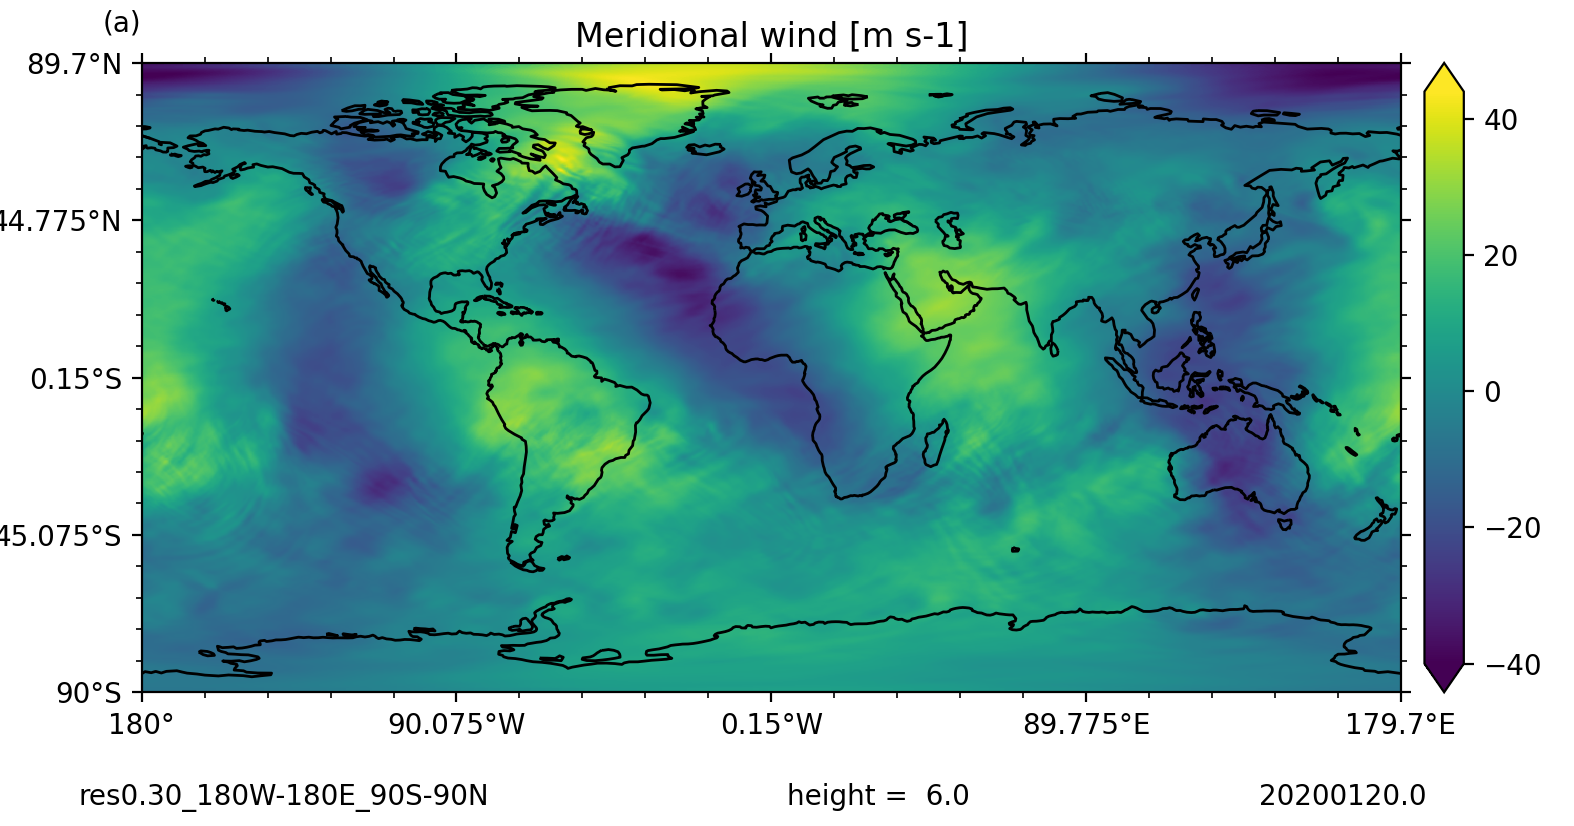

Output()

In [137]:
PyicV = view.hplot(ds, 
#                    lon_reg=[-85,-75], lat_reg=[19,24], # comment this line to get global plot (be careful his tgrid)
#                    lon_reg=[-180,180], lat_reg=[-90,90],
                   land_facecolor='none', # comment this line and get land masses filled
#                    logplot=True, # maybe you want to use this for plotting ke
                  )